# **News Article Classification NLP Project**

#### Goal of this project is to build a classification model that can automatically categorize news articles into different predefined categories.

In today’s digital landscape, news articles are generated and shared at an unprecedented scale. For platforms like news aggregators, media outlets, and social networks, automatically classifying articles into categories such as **sports**, **politics**, and **technology** is essential for improving content organization and recommendation systems.

This project aims to build a robust machine learning model that can accurately classify news articles into predefined categories based on their textual content. By automating this process, we enable faster and smarter content delivery, helping readers access relevant information aligned with their interests.

Key objectives:
- Cleaning and preparing the text data.
- Preprocess and vectorize text data using TF-IDF and Word Embedding.
- Train and evaluate classification models (Logistic Regression, Naive Bayes, SVM).
- Deploy a prediction pipeline that returns the most likely category for any given article.


## **Data Collection and Preprocessing**

#### Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:

#importing library for NLP project

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Reading Dataset
df=pd.read_excel("data_news.xlsx")

In [6]:
datanews_df=df.copy()

In [7]:
datanews_df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [8]:
datanews_df.shape # diplaying shape of Datanews dataset

(50000, 5)

In [9]:
datanews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  49994 non-null  object
 4   keywords           47294 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [10]:
# Finding Duplicates and removing them
print(datanews_df.duplicated().sum())
datanews_df.drop_duplicates(inplace=True)

4251


In [11]:
print(datanews_df.duplicated().sum())

0


#### Removed Duplicates
#### Handles missing values in short_description and keywords columns


In [12]:
datanews_df.shape

(45749, 5)

In [13]:
# Handling missing value
datanews_df['keywords']=datanews_df['keywords'].fillna('unknown')
datanews_df['short_description']=datanews_df['short_description'].fillna('No Description')

In [14]:
datanews_df.isnull().sum()

category             0
headline             0
links                0
short_description    0
keywords             0
dtype: int64

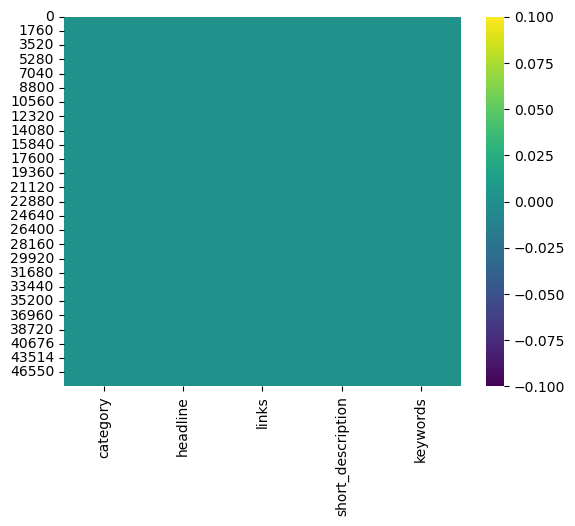

In [15]:
sns.heatmap(datanews_df.isnull(), cmap="viridis")
plt.show()


#### No missing data present in dataset

In [16]:
datanews_df['category'].value_counts()

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          3091
SPORTS            2658
Name: count, dtype: int64

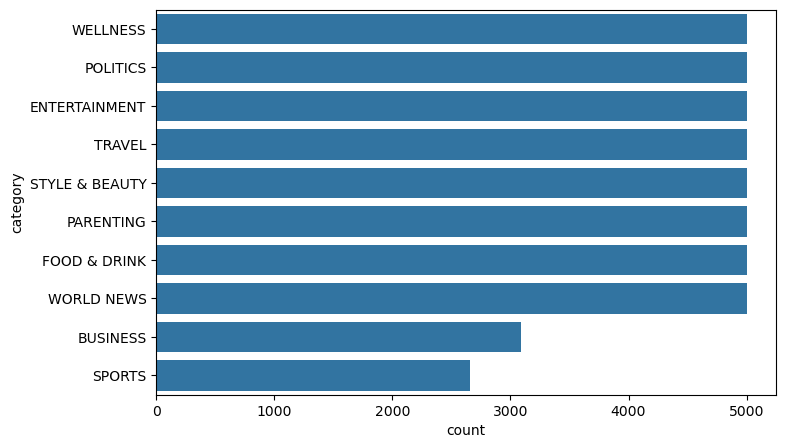

In [17]:

plt.figure(figsize=(8,5))
sns.countplot(datanews_df['category'])
plt.show()

#### Dataset is imbalanced.
#### Most categories (like WELLNESS, POLITICS, ENTERTAINMENT) have close to 5000 articles.
#### BUSINESS and SPORTS have fewer — around 3091 and 2658, respectively.

In [18]:
datanews_df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


#### Analysing Length of Headline Short_description and keywords

In [19]:
# Combine headline, description, and keywords
datanews_df['combine_text'] = (
    datanews_df['headline'].astype(str) + " " +
    datanews_df['short_description'].astype(str) + " " +
    datanews_df['keywords'].astype(str)
)


# Word and character counts on combined text
datanews_df['word_count']=datanews_df['combine_text'].apply(lambda x:len(str(x).split())) # Word count
datanews_df['char_count']=datanews_df['combine_text'].apply(lambda x:len(str(x))) # Character count


Average Length =          category  word_count
0        BUSINESS   36.639599
1   ENTERTAINMENT   28.425000
2    FOOD & DRINK   27.130400
3       PARENTING   39.859800
4        POLITICS   30.972000
5          SPORTS   27.545147
6  STYLE & BEAUTY   33.298600
7          TRAVEL   37.325000
8        WELLNESS   40.697200
9      WORLD NEWS   31.680000


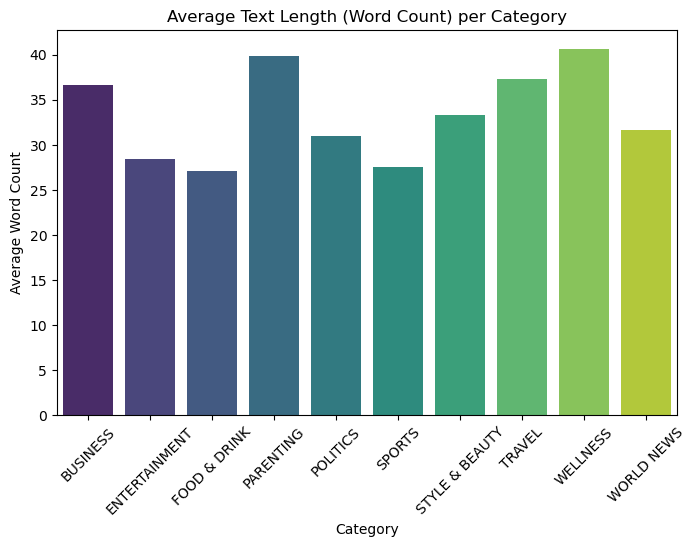

In [20]:
# Group by category and calculate mean word count
avg_length = datanews_df.groupby('category')['word_count'].mean().reset_index()
print("Average Length =",avg_length)

#visualization (bar chart)

plt.figure(figsize=(8,5))
sns.barplot(x='category', y='word_count', data=avg_length, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Text Length (Word Count) per Category")
plt.ylabel("Average Word Count")
plt.xlabel("Category")
plt.show()

#### WELLNESS and PARENTING articles are longest on average; FOOD & DRINK has the shortest content.
#### This suggests deeper storytelling in some categories and concise formats in others.


### **Outlier Detection**

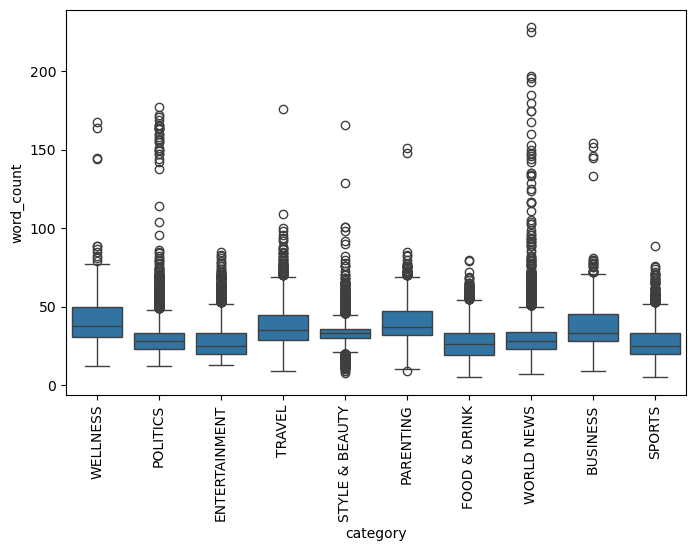

In [21]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8, 5))
sns.boxplot(x='category', y='word_count', data=datanews_df)
plt.xticks(rotation=90)
plt.show()

#### STYLE & BEAUTY and WELLNESS categories show the widest spread and most outliers in word count.
####  These outliers may reflect unusually long or short articles that could skew model training.

In [22]:
Q1, Q3 = datanews_df['word_count'].quantile([0.25, 0.75]);
IQR = Q3 - Q1
outliers = datanews_df[(datanews_df['word_count'] < Q1 - 1.5*IQR) | (datanews_df['word_count'] > Q3 + 1.5*IQR)]
outliers.head()

,category,headline,links,short_description,keywords,combine_text,word_count,char_count
10,WELLNESS,Conflict: 7 Decisions to Learn Instead of Fight,https://www.huffingtonpost.com/entry/conflict-...,If the other person never opens to caring conf...,conflict-resolution,Conflict: 7 Decisions to Learn Instead of Figh...,64,386
46,WELLNESS,Tis the Season to Be Stressed: A Survival Guide,https://www.huffingtonpost.com/entry/holiday-s...,"This week, the harried prep for Thanksgiving u...",holiday-stress,Tis the Season to Be Stressed: A Survival Guid...,164,938
124,WELLNESS,5 Workout Wardrobe Fails and How to Avoid Them,https://www.huffingtonpost.com/entry/workout-t...,"I've had earbuds that malfunction, sports bras...",workout-tips,5 Workout Wardrobe Fails and How to Avoid Them...,68,388
141,WELLNESS,Dating Fears: 'I Don't Know The First Thing A...,https://www.huffingtonpost.com/entry/dating-fe...,I don't know the first thing about choosing th...,dating-fears,Dating Fears: 'I Don't Know The First Thing A...,65,341
165,WELLNESS,3 Ways You Zap Happiness (And How to Get It Back),https://www.huffingtonpost.com/entry/happiness...,Happiness is an approach to life. It's a minds...,happiness-tips,3 Ways You Zap Happiness (And How to Get It Ba...,74,424


### Text Normalization

In [23]:
#convert into Lowercase
datanews_df['combine_text']=datanews_df['combine_text'].str.lower()
datanews_df['category']=datanews_df['category'].str.lower()
datanews_df[['combine_text','category']].head()

,combine_text,category
0,143 miles in 35 days: lessons learned resting ...,wellness
1,talking to yourself: crazy or crazy helpful? t...,wellness
2,crenezumab: trial will gauge whether alzheimer...,wellness
3,"oh, what a difference she made if you want to ...",wellness
4,"green superfoods first, the bad news: soda bre...",wellness


In [24]:
#Remove puctuations
import string
datanews_df['combine_text'] = datanews_df['combine_text'].str.translate(str.maketrans('', '', string.punctuation))
datanews_df[['combine_text','category']].head()

,combine_text,category
0,143 miles in 35 days lessons learned resting i...,wellness
1,talking to yourself crazy or crazy helpful thi...,wellness
2,crenezumab trial will gauge whether alzheimers...,wellness
3,oh what a difference she made if you want to b...,wellness
4,green superfoods first the bad news soda bread...,wellness


In [25]:
# Remove numbers
datanews_df['combine_text'] = datanews_df['combine_text'].str.replace(r'\d+', '', regex=True)
datanews_df[['combine_text']].head()

,combine_text
0,miles in days lessons learned resting is par...
1,talking to yourself crazy or crazy helpful thi...
2,crenezumab trial will gauge whether alzheimers...
3,oh what a difference she made if you want to b...
4,green superfoods first the bad news soda bread...


In [26]:
# Remove leading, trailing, and multiple spaces
datanews_df['combine_text'] = datanews_df['combine_text'].str.strip().str.replace(r'\s+', ' ', regex=True)
datanews_df[['combine_text']].head()

,combine_text
0,miles in days lessons learned resting is part ...
1,talking to yourself crazy or crazy helpful thi...
2,crenezumab trial will gauge whether alzheimers...
3,oh what a difference she made if you want to b...
4,green superfoods first the bad news soda bread...


#### Remove Stopwords

In [27]:
# Remove stopwords
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))
datanews_df['combine_text'] = datanews_df['combine_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

datanews_df[['combine_text']].head()

,combine_text
0,miles days lessons learned resting part traini...
1,talking crazy crazy helpful think talking tool...
2,crenezumab trial gauge whether alzheimers drug...
3,oh difference made want busy keep trying perfe...
4,green superfoods first bad news soda bread cor...


### Stemming and Lemmatizing

In [28]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    return ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in text.split()])

datanews_df['clean_text'] = datanews_df['combine_text'].apply(normalize_text)
datanews_df[['clean_text','category']].head()


,clean_text,category
0,mile day lesson learn rest part train ive conf...,wellness
1,talk crazi crazi help think talk tool coach ch...,wellness
2,crenezumab trial gaug whether alzheim drug pre...,wellness
3,oh differ made want busi keep tri perfect want...,wellness
4,green superfood first bad news soda bread corn...,wellness


## **Feature Extraction**

In [29]:
#  One-hot encoding for category column
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(datanews_df[['category']])
print("One-Hot Encoded for Category is done")
print( category_encoded.shape)



One-Hot Encoded for Category is done
(45749, 10)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(datanews_df['clean_text'])
print("TF-IDF Vectorization is done")
print(X_tfidf.shape)



TF-IDF Vectorization is done
(45749, 2000)


In [31]:
# Decide X and  y (true output column)
from scipy.sparse import hstack

X = X_tfidf
y = datanews_df['category']
print("TF-IDF shape:", X.shape)

TF-IDF shape: (45749, 2000)


In [32]:
!pip install gensim

### Word Embeding

In [33]:
#Word Embeding

from gensim.models import Word2Vec

sentences = [text.split() for text in datanews_df['clean_text']]


# Train Word2Vec model
w2v_model = Word2Vec(
    sentences,          # tokenized text
    vector_size=100,    # embedding dimension (you can try 50, 100, 300)
    window=5,           # context window size
    min_count=2,        # ignore rare words
    workers=4           # parallel training
)

def get_doc_embedding(text):
    words = text.split()
    vectors = [w2v_model.wv[w] for w in words if w in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)  # fallback if no known words
    return np.mean(vectors, axis=0)

X_emb = np.array([get_doc_embedding(t) for t in datanews_df['clean_text']])

y_emb = datanews_df['category']
print("Word2Vec Embedding shape:", X_emb.shape)


Word2Vec Embedding shape: (45749, 100)


### Category Disribution

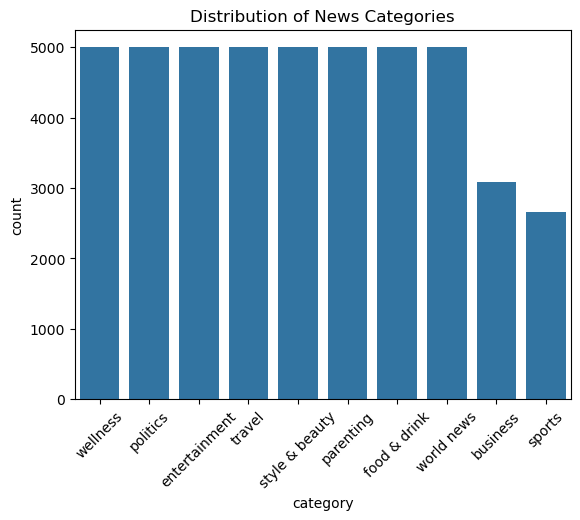

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=datanews_df['category'])
plt.title("Distribution of News Categories")
plt.xticks(rotation=45)
plt.show()


### Text Length Analysis

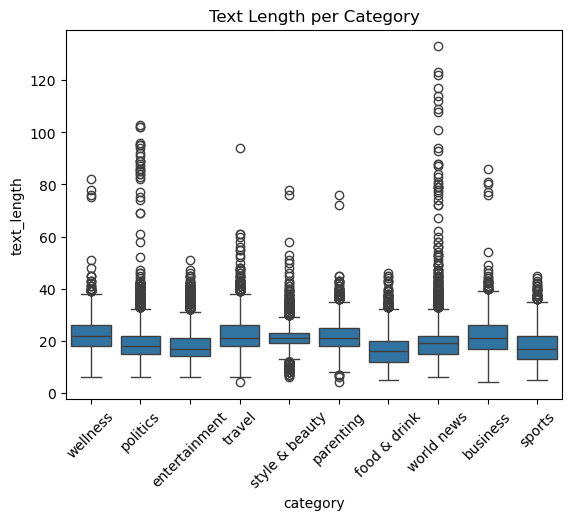

In [35]:
datanews_df['text_length'] = datanews_df['clean_text'].apply(lambda x: len(x.split()))

sns.boxplot(x='category', y='text_length', data=datanews_df)
plt.title("Text Length per Category")
plt.xticks(rotation=45)
plt.show()


### Most Frequent Words

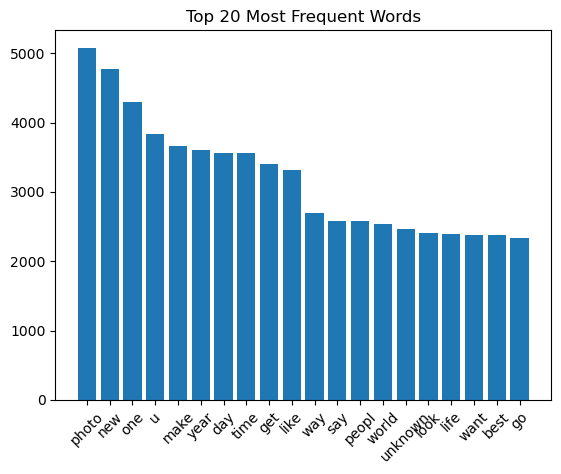

In [36]:
# check for most frequesnt words
from collections import Counter

all_words = ' '.join(datanews_df['clean_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.show()


### Compare Category vs Embedding Length

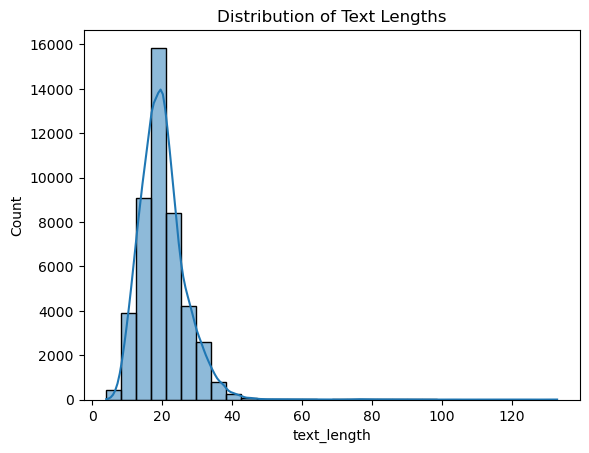

In [37]:
sns.histplot(datanews_df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.show()


### Data Spliting

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Bulding**

### **Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

### **Naive Bayes**

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

### **SVM**

In [57]:
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight='balanced')
svm.fit(X_train, y_train)


LinearSVC(class_weight='balanced')

### **Model Evaluation**


Model: LogisticRegression
                precision    recall  f1-score   support

      business       0.60      0.68      0.64       631
 entertainment       0.73      0.72      0.73       990
  food & drink       0.84      0.83      0.83       994
     parenting       0.78      0.77      0.77       973
      politics       0.76      0.69      0.72      1001
        sports       0.67      0.75      0.71       533
style & beauty       0.84      0.81      0.83      1027
        travel       0.80      0.77      0.78       983
      wellness       0.72      0.74      0.73      1024
    world news       0.76      0.78      0.77       994

      accuracy                           0.76      9150
     macro avg       0.75      0.75      0.75      9150
  weighted avg       0.76      0.76      0.76      9150


Accuracy: 0.7577049180327868





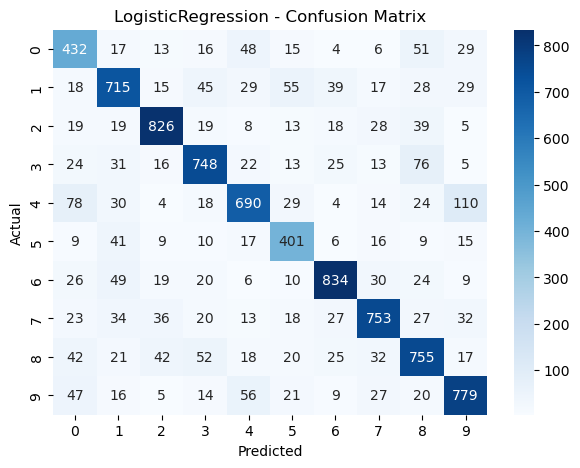


Model: MultinomialNB
                precision    recall  f1-score   support

      business       0.73      0.49      0.58       631
 entertainment       0.71      0.72      0.71       990
  food & drink       0.80      0.83      0.81       994
     parenting       0.64      0.75      0.69       973
      politics       0.72      0.71      0.71      1001
        sports       0.85      0.56      0.68       533
style & beauty       0.83      0.76      0.79      1027
        travel       0.74      0.79      0.77       983
      wellness       0.68      0.73      0.71      1024
    world news       0.75      0.81      0.78       994

      accuracy                           0.73      9150
     macro avg       0.74      0.72      0.72      9150
  weighted avg       0.74      0.73      0.73      9150


Accuracy: 0.7343169398907103





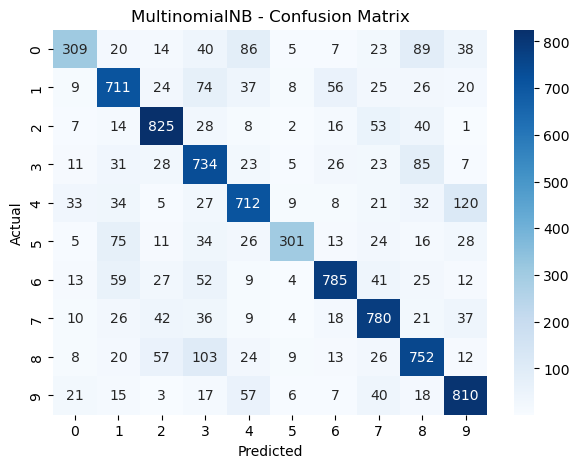


Model: LinearSVC
                precision    recall  f1-score   support

      business       0.61      0.64      0.62       631
 entertainment       0.74      0.70      0.72       990
  food & drink       0.82      0.84      0.83       994
     parenting       0.77      0.77      0.77       973
      politics       0.75      0.69      0.72      1001
        sports       0.67      0.71      0.69       533
style & beauty       0.82      0.82      0.82      1027
        travel       0.78      0.77      0.77       983
      wellness       0.72      0.73      0.73      1024
    world news       0.75      0.78      0.77       994

      accuracy                           0.75      9150
     macro avg       0.74      0.74      0.74      9150
  weighted avg       0.75      0.75      0.75      9150


Accuracy: 0.7503825136612022





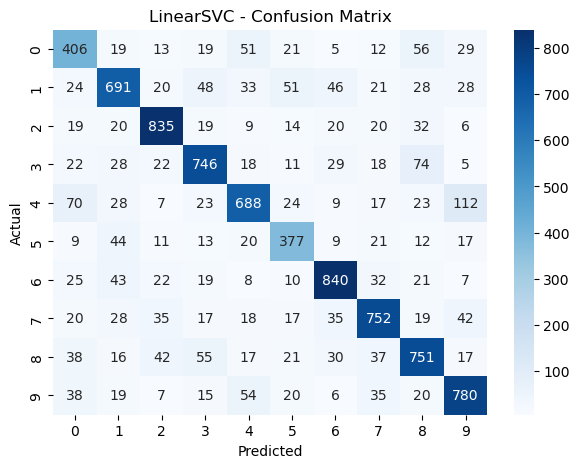

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

# Dictionary to store accuracy
accuracy_scores = {}

for model in [lr, nb, svm]:
    y_pred = model.predict(X_test)
    acc = model.score(X_test, y_test)
    accuracy_scores[model.__class__.__name__] = acc

        # Print reports
    print(f"\nModel: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print("\nAccuracy:", acc)
    print("\n\n")

    #Confusion matrix visualization
    plt.figure(figsize=(7,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model.__class__.__name__} - Confusion Matrix")
    plt.show()



### Check for Feature Importance

In [44]:
# Get feature names from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Coefficients from the best Logistic Regression model
coefficients = best_lr.coef_

# Map each class to its top features
for idx, category in enumerate(best_lr.classes_):
    top10_idx = np.argsort(coefficients[idx])[-10:]   # top 10 positive
    bottom10_idx = np.argsort(coefficients[idx])[:10] # top 10 negative
    
    print(f"\nCategory: {category}")
    print("Top positive words:", [feature_names[i] for i in top10_idx])
    print("Top negative words:", [feature_names[i] for i in bottom10_idx])



Category: business
Top positive words: ['bank', 'wall st', 'employe', 'walmart', 'uber', 'market', 'job', 'ceo', 'compani', 'busi']
Top negative words: ['photo', 'child', 'travel', 'kid', 'fashion', 'mom', 'republican', 'recip', 'eat', 'senat']

Category: entertainment
Top positive words: ['kardashian', 'box offic', 'album', 'music', 'singer', 'actor', 'movi', 'jenner', 'trailer', 'film']
Top negative words: ['photo', 'food', 'recip', 'fashion', 'travel', 'style', 'unknown', 'kid', 'parent', 'state']

Category: food & drink
Top positive words: ['cake', 'kitchen', 'tast', 'chef', 'chees', 'cook', 'wine', 'cocktail', 'food', 'recip']
Top negative words: ['travel', 'kid', 'parent', 'health', 'music', 'feel', 'calori', 'hair', 'child', 'fashion']

Category: parenting
Top positive words: ['pregnanc', 'son', 'breastfeed', 'toddler', 'daughter', 'babi', 'child', 'mom', 'parent', 'kid']
Top negative words: ['travel', 'recip', 'fashion', 'welcom', 'photo', 'hotel', 'style', 'singer', 'jame', '

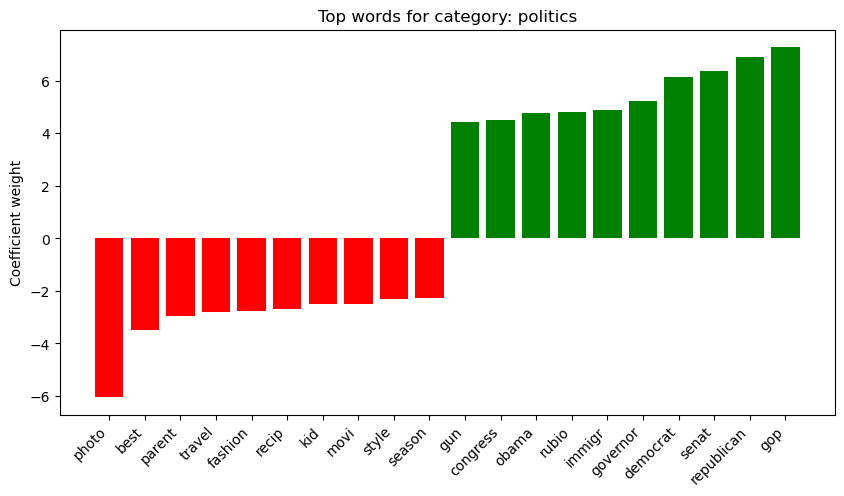

In [45]:
def plot_top_words(classifier, feature_names, category, class_index, top_n=10):
    # Get coefficients for the category
    coef = classifier.coef_[class_index]
    
    # Top positive and negative indices
    top_pos_idx = np.argsort(coef)[-top_n:]
    top_neg_idx = np.argsort(coef)[:top_n]
    
    # Combine indices
    top_idx = np.concatenate([top_neg_idx, top_pos_idx])
    
    # Plot
    plt.figure(figsize=(10,5))
    colors = ['red']*top_n + ['green']*top_n
    plt.bar(range(2*top_n), coef[top_idx], color=colors)
    plt.xticks(range(2*top_n), [feature_names[i] for i in top_idx], rotation=45, ha='right')
    plt.title(f"Top words for category: {category}")
    plt.ylabel("Coefficient weight")
    plt.show()

# Example: plot for 'politics' category
plot_top_words(best_lr, feature_names, "politics", list(best_lr.classes_).index("politics"))


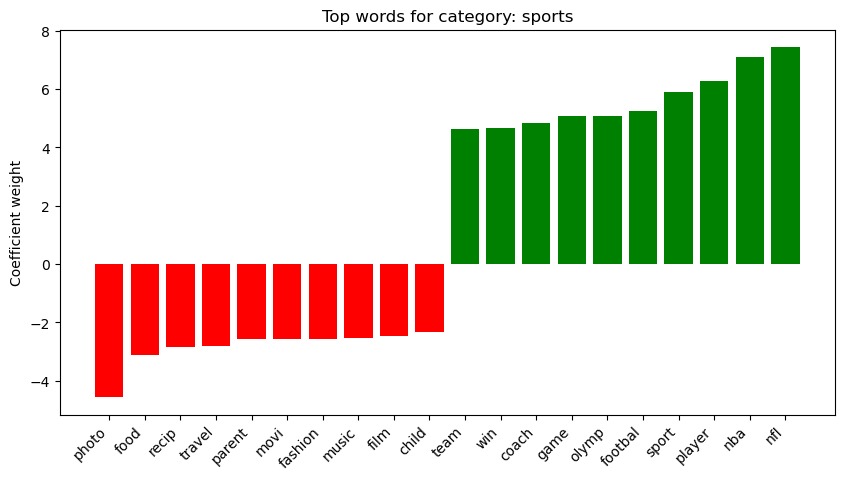

In [46]:
# Example: plot for 'politics' category
plot_top_words(best_lr, feature_names, "sports", list(best_lr.classes_).index("sports"))

# **Hyperparamter Tuning**



### **Logistic Regression with Hyper parameter Tuning — RandomizedSearchCV**

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define model
lr = LogisticRegression(multi_class='auto')

# Define hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500, 1000],
    'solver': ['liblinear', 'lbfgs']
}

# RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search_lr.fit(X_train, y_train)

# Get best model
best_lr = random_search_lr.best_estimator_

# Evaluate best model
y_pred = best_lr.predict(X_test)

print("Best Parameters:", random_search_lr.best_params_)
print("Best CV Accuracy:", random_search_lr.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Best Parameters: {'solver': 'liblinear', 'max_iter': 200, 'C': 1}
Best CV Accuracy: 0.7503211045135163
Test Accuracy: 0.7572677595628415

Classification Report:
                 precision    recall  f1-score   support

      business       0.70      0.58      0.64       631
 entertainment       0.71      0.74      0.72       990
  food & drink       0.83      0.85      0.84       994
     parenting       0.76      0.79      0.78       973
      politics       0.74      0.72      0.73      1001
        sports       0.79      0.63      0.70       533
style & beauty       0.82      0.82      0.82      1027
        travel       0.78      0.77      0.78       983
      wellness       0.70      0.75      0.72      1024
    world news       0.74      0.80      0.77       994

      accuracy                           0.76      9150
     macro avg       0.76      0.75      0.75      9150
  weighted avg       0.76      0.76      0.76      9150



### **Confusion Matrix Heatmap for Logistic Regression**

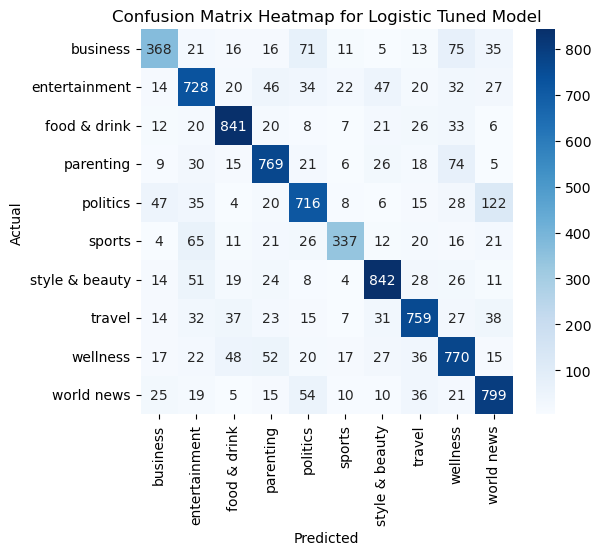

In [47]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_lr.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_lr.classes_,
            yticklabels=best_lr.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap for Logistic Tuned Model")
plt.show()


### **Navie Bayes with Hyperparameter Tuning**

In [48]:

# Define model
nb = MultinomialNB()

# Define hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]   # smoothing parameter
}

# RandomizedSearchCV
random_search_nb = RandomizedSearchCV(
    estimator=nb,
    param_distributions=param_grid,
    n_iter=5,              # number of random samples from param_grid
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search_nb.fit(X_train, y_train)

# Get best model
best_nb = random_search_nb.best_estimator_

# Evaluate best model
y_pred_nb = best_nb.predict(X_test)

print("Best Parameters:", random_search_nb.best_params_)
print("Best CV Accuracy:", random_search_nb.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Best Parameters: {'alpha': 1.0}
Best CV Accuracy: 0.7297193695277728
Test Accuracy: 0.7343169398907103

Classification Report:
                 precision    recall  f1-score   support

      business       0.73      0.49      0.58       631
 entertainment       0.71      0.72      0.71       990
  food & drink       0.80      0.83      0.81       994
     parenting       0.64      0.75      0.69       973
      politics       0.72      0.71      0.71      1001
        sports       0.85      0.56      0.68       533
style & beauty       0.83      0.76      0.79      1027
        travel       0.74      0.79      0.77       983
      wellness       0.68      0.73      0.71      1024
    world news       0.75      0.81      0.78       994

      accuracy                           0.73      9150
     macro avg       0.74      0.72      0.72      9150
  weighted avg       0.74      0.73      0.73      9150



### **Confusion Matrix Heatmap for Naive Bayes**

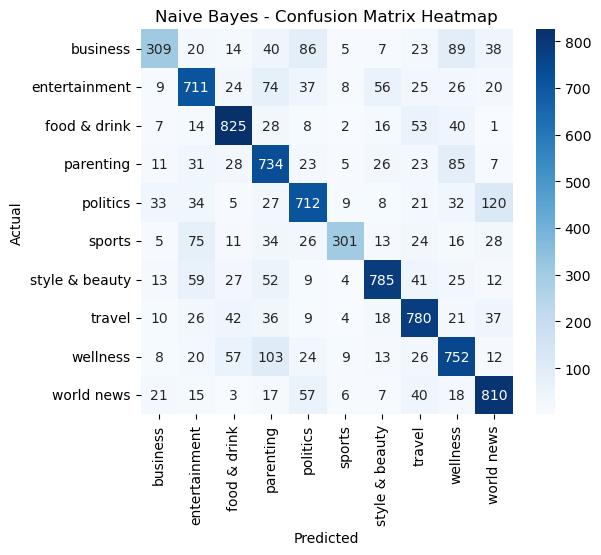

In [49]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_nb, labels=best_nb.classes_)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_nb.classes_,
            yticklabels=best_nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix Heatmap")
plt.show()

### **SVM with Hyperparameter Tuning**

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Define the search space
param_grid = {
    "C": [0.1, 1, 10]  # Regularization strength
}

# Set up scoring
scoring = 'accuracy'

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# Define model
svm = LinearSVC()

# GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring=scoring,
    cv=kfold,
    n_jobs=-1
)

# Fit on training data
grid_search_svm.fit(X_train, y_train)

# Get best model
best_svm = grid_search_svm.best_estimator_

# Evaluate best model
y_pred_svm = best_svm.predict(X_test)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best CV Accuracy:", grid_search_svm.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Best Parameters: {'C': 0.1}
Best CV Accuracy: 0.7504850281107874
Test Accuracy: 0.7558469945355192

Classification Report:
                 precision    recall  f1-score   support

      business       0.69      0.57      0.63       631
 entertainment       0.72      0.73      0.73       990
  food & drink       0.82      0.85      0.84       994
     parenting       0.76      0.79      0.77       973
      politics       0.74      0.71      0.73      1001
        sports       0.76      0.64      0.70       533
style & beauty       0.81      0.82      0.82      1027
        travel       0.78      0.77      0.77       983
      wellness       0.70      0.75      0.73      1024
    world news       0.74      0.81      0.77       994

      accuracy                           0.76      9150
     macro avg       0.75      0.74      0.75      9150
  weighted avg       0.76      0.76      0.75      9150



### **Confusion Matrix Heatmap for SVM**

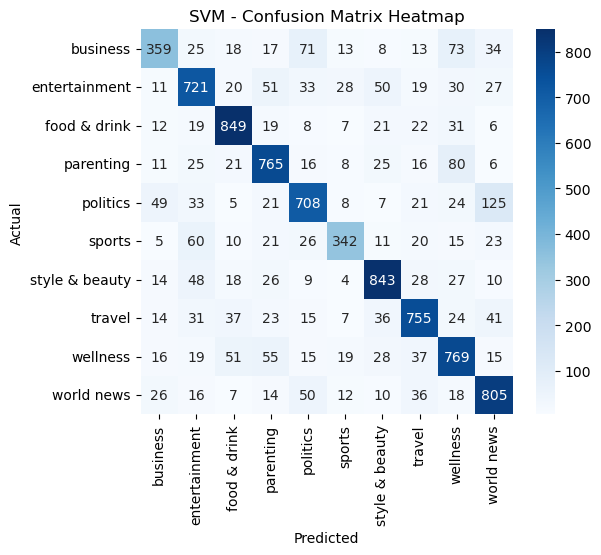

In [51]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=best_svm.classes_)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_svm.classes_,
            yticklabels=best_svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM - Confusion Matrix Heatmap")
plt.show()

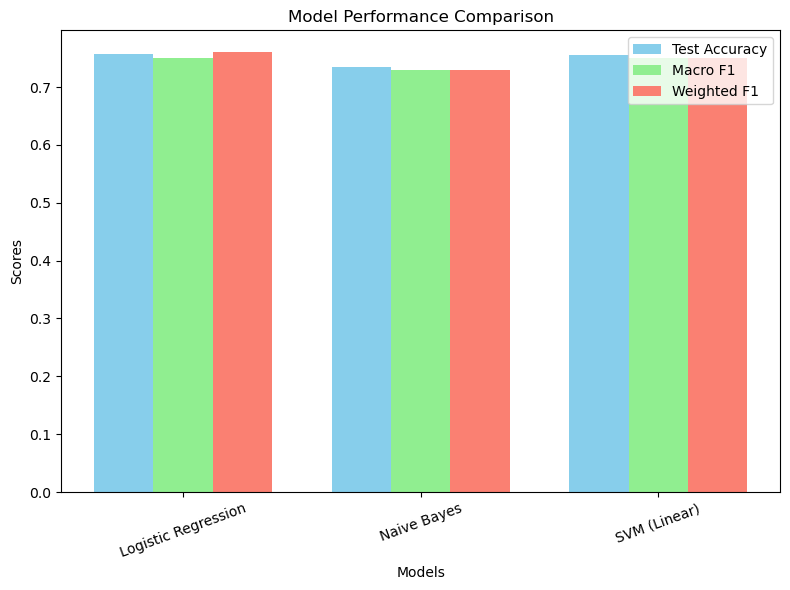

In [52]:
# Model names
models = ["Logistic Regression", "Naive Bayes", "SVM (Linear)"]

# Metrics
test_accuracy = [0.7573, 0.7343, 0.7558]
macro_f1 = [0.75, 0.73, 0.75]
weighted_f1 = [0.76, 0.73, 0.75]

# Grouped bar chart setup
x = np.arange(len(models))  # positions
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(8,6))

# Plot bars
ax.bar(x - width, test_accuracy, width, label='Test Accuracy', color='skyblue')
ax.bar(x, macro_f1, width, label='Macro F1', color='lightgreen')
ax.bar(x + width, weighted_f1, width, label='Weighted F1', color='salmon')

# Labels and formatting
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.legend()

# Show chart
plt.tight_layout()
plt.show()


In [53]:
!pip install prettytable

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable

# Initialize PrettyTable with column names
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# List of models to compare
models = {
    "Logistic Regression": best_lr,
    "Naive Bayes": nb,
    "SVM": svm
}

# Evaluate each model and add rows to the table
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred, average='macro'), 4)
    recall = round(recall_score(y_test, y_pred, average='macro'), 4)
    f1 = round(f1_score(y_test, y_pred, average='macro'), 4)
    
    table.add_row([name, accuracy, precision, recall, f1])

# Print the table
print("\n\033[1mModel Comparison Table\033[0m")
print(table)



Model Comparison Table
+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |  0.7573  |   0.7568  | 0.745  |  0.7493  |
|     Naive Bayes     |  0.7343  |   0.7435  | 0.7175 |  0.7243  |
|         SVM         |  0.7504  |   0.7418  | 0.7444 |  0.7427  |
+---------------------+----------+-----------+--------+----------+


### Compare Models with **Cross-Validation**

In [59]:
from sklearn.model_selection import cross_val_score
models = {
    "Logistic Regression": best_lr,
    "Naive Bayes": nb,
    "SVM": svm
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"\n{name}")
    print("CV Scores:", scores)
    print("Mean Accuracy:", scores.mean())



Logistic Regression
CV Scores: [0.75595628 0.75639344 0.74568306 0.7568306  0.75582031]
Mean Accuracy: 0.75413673924171

Naive Bayes
CV Scores: [0.73540984 0.73125683 0.72797814 0.73759563 0.73691114]
Mean Accuracy: 0.7338303149975482

SVM
CV Scores: [0.75147541 0.74557377 0.73956284 0.74808743 0.74707618]
Mean Accuracy: 0.7463551273482664


#  Model Comparison Insights


**Logistic Regression**
- Most balanced model across all categories.
- Fast to train and easy to interpret.
- Strong performance on majority and minority classes.
- Best choice for production and reporting.

**Naive Bayes**
- Fastest to train.
- Performs well on frequent categories.
- Underperforms on minority classes like 'business' and 'parenting'.
- Good for baseline or ensemble use.

**SVM (Linear)**
- Matches Logistic Regression in accuracy and F1-score.
- Much slower to train, especially with large TF-IDF matrices.
- Not ideal for iterative tuning or large-scale deployment.

**Final Recommendation:**
- Use Logistic Regression as your primary model — it offers the best trade-off between performance, speed, and interpretability.


## **Model Deployment**

In [60]:
import joblib
joblib.dump(best_lr, "category_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf.pkl")

['tfidf.pkl']

In [61]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Load trained model and vectorizer
model = joblib.load("category_model.pkl")
vectorizer = joblib.load("tfidf.pkl")

# 2. Function to predict category with confidence
def predict_category(article_text):
    # Transform article into TF-IDF features
    X_input = vectorizer.transform([article_text])
    
    # Predict category
    prediction = model.predict(X_input)[0]
    
    # Confidence scores (probabilities)
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_input)[0]
        confidence = max(probs)
        # Map classes to probabilities
        class_probs = dict(zip(model.classes_, probs))
    else:
        # Fallback if model doesn't support predict_proba
        confidence = None
        class_probs = None
    
    return prediction, confidence, class_probs

# 3. Example usage
article = """
The new Michelin-starred restaurant in Mumbai is redefining Indian cuisine with its fusion of traditional spices and modern plating. 
Their signature dish, saffron-infused lamb biryani, has become a favorite among food critics and tourists alike.
"""

predicted_category, confidence, class_probs = predict_category(article)
print("Article: \n",article)
print("Predicted Category:", predicted_category)
print("\nConfidence Score:", confidence)



Article: 
 
The new Michelin-starred restaurant in Mumbai is redefining Indian cuisine with its fusion of traditional spices and modern plating. 
Their signature dish, saffron-infused lamb biryani, has become a favorite among food critics and tourists alike.

Predicted Category: food & drink

Confidence Score: 0.7609241667096004


## **Final Conclusion & Future Work**

In this project, I successfully built a machine learning model to classify news articles into predefined categories using TF-IDF features and classical algorithms. Logistic Regression emerged as the best-performing model, achieving an accuracy of **76%**, while also offering strong interpretability through feature importance analysis.

While the model performs well overall, it struggles slightly with underrepresented categories such as *Business* and *Sports*. This highlights a limitation in class balance and feature richness. Future work could explore the following enhancements:

- **Advanced Models**: Implement deep learning architectures like LSTM or BERT for richer text understanding.
- **Improved Feature Engineering**: Integrate word embeddings such as GloVe or contextual embeddings for semantic depth.
- **Class Imbalance Handling**: Apply techniques like SMOTE or class-weighted loss functions to improve minority class performance.
- **Model Deployment**: Build a user-friendly interface or API for real-time article classification.
- **Explainability Tools**: Use SHAP or LIME to visualize and explain model predictions for transparency.

Overall, this project lays a strong foundation for scalable, automated news categorization. With further enhancements, it can significantly improve content delivery and user experience across digital platforms.


## Prepared By: **Vandana Bhavsar**